<a href="https://colab.research.google.com/github/Wesley00s/CNN/blob/main/CNN_Pratice3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras import Model

# Dataset

In [ ]:
!kaggle datasets download d4rklucif3r/cat-and-dogs

Dataset URL: https://www.kaggle.com/datasets/d4rklucif3r/cat-and-dogs
License(s): DbCL-1.0
 92% 201M/218M [00:01<00:00, 162MB/s]
100% 218M/218M [00:01<00:00, 122MB/s]


In [ ]:
!unzip -q cat-and-dogs.zip

# Image generator

In [ ]:
dir_train = '/content/dataset/training_set'
dir_test = '/content/dataset/test_set'

In [ ]:
data_generator_train = ImageDataGenerator(
    rescale=1./255.0,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2
)
data_generator_test = ImageDataGenerator(rescale=1./255.0)

In [ ]:
train_generator = data_generator_train.flow_from_directory(
    dir_train,
    batch_size=32,
    target_size=(224,224),
    class_mode='sparse'
)

Found 8000 images belonging to 2 classes.


In [ ]:
test_generator = data_generator_test.flow_from_directory(
    dir_test,
    batch_size=32,
    target_size=(224,224),
    class_mode='sparse'
)

Found 2000 images belonging to 2 classes.


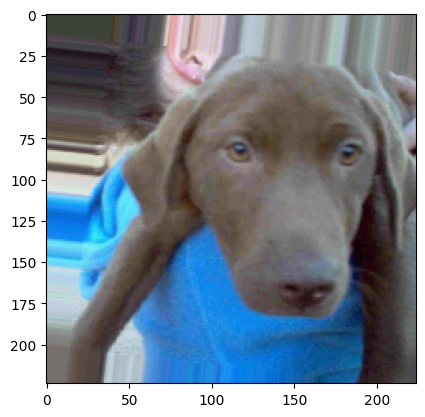

In [ ]:
plt.imshow(train_generator[0][0][4])

# Obtain RNN model (Xception)

In [ ]:
model = Xception(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.trainable = False

In [ ]:
average_pooling = GlobalAveragePooling2D()(model.output)

In [ ]:
hidden = Dense(2048, activation='relu')(average_pooling)

In [ ]:
dropout = Dropout(0.2)(hidden)

In [ ]:
pred = Dense(1, activation='sigmoid')(dropout)

In [ ]:
final_model = Model(inputs=model.input, outputs=pred)

# Model Summary

In [ ]:
final_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 111, 111, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_bn           │ (None, 111, 111, 32)   │            128 │ block1_conv1[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_act          │ (None, 111, 111, 32)   │              0 │ block1_conv1_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 109, 109, 64)   │         18,432 │ block1_conv1_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_bn           │ (None, 109, 109, 64)   │            256 │ block1_conv2[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_act          │ (None, 109, 109, 64)   │              0 │ block1_conv2_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1           │ (None, 109, 109, 128)  │          8,768 │ block1_conv2_act[0][0] │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1_bn        │ (None, 109, 109, 128)  │            512 │ block2_sepconv1[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_act       │ (None, 109, 109, 128)  │              0 │ block2_sepconv1_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2           │ (None, 109, 109, 128)  │         17,536 │ block2_sepconv2_act[0… │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_bn        │ (None, 109, 109, 128)  │            512 │ block2_sepconv2[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 55, 55, 128)    │          8,192 │ block1_conv2_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 55, 55, 128)    │              0 │ block2_sepconv2_bn[0]… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization  

 Total params: 25,059,881 (95.60 MB)

 Trainable params: 4,198,401 (16.02 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

# Compile model

In [ ]:
final_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Training model

In [ ]:
final_model.fit(
    train_generator,
    epochs=10,
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 117s 390ms/step - accuracy: 0.9447 - loss: 0.1680
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 130s 394ms/step - accuracy: 0.9804 - loss: 0.0546
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 142s 396ms/step - accuracy: 0.9837 - loss: 0.0402
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 141s 390ms/step - accuracy: 0.9792 - loss: 0.0501
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 101s 391ms/step - accuracy: 0.9840 - loss: 0.0395
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 141s 391ms/step - accuracy: 0.9871 - loss: 0.0383
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 143s 397ms/step - accuracy: 0.9880 - loss: 0.0311
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 141s 391ms/step - accuracy: 0.9845 - loss: 0.0408
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 143s 397ms/step - accuracy: 0.9876 - loss: 0.0329
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 100s 390ms/step - accuracy: 0.9853 - loss: 0.0369


# Evaluate model

In [ ]:
final_model.evaluate(test_generator)

63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 223ms/step - accuracy: 0.9878 - loss: 0.0434


[0.0356886051595211, 0.9915000200271606]

In [ ]:
img_test  = test_generator[0][0][2]

final_model.predict(np.expand_dims(img_test, axis=0))
class_names = ['Cat', 'Dog']
predicted_class = (final_model.predict(np.expand_dims(img_test, axis=0)))

if(predicted_class[0][0] <= 0.5):
  print(class_names[0])
else:
  print(class_names[1])

print(f'{predicted_class[0][0] = }')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Cat
predicted_class[0][0] = 6.2762254e-08


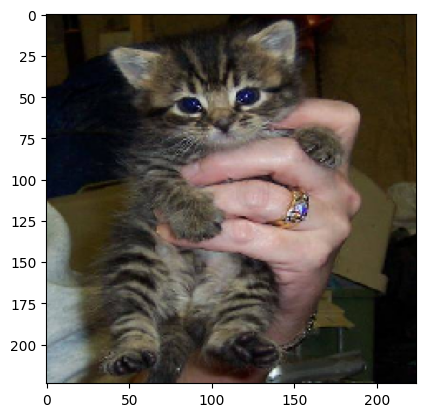

In [ ]:
plt.imshow(img_test)

In [ ]:
final_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 111, 111, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_bn           │ (None, 111, 111, 32)   │            128 │ block1_conv1[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_act          │ (None, 111, 111, 32)   │              0 │ block1_conv1_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 109, 109, 64)   │         18,432 │ block1_conv1_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_bn           │ (None, 109, 109, 64)   │            256 │ block1_conv2[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_act          │ (None, 109, 109, 64)   │              0 │ block1_conv2_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1           │ (None, 109, 109, 128)  │          8,768 │ block1_conv2_act[0][0] │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1_bn        │ (None, 109, 109, 128)  │            512 │ block2_sepconv1[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_act       │ (None, 109, 109, 128)  │              0 │ block2_sepconv1_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2           │ (None, 109, 109, 128)  │         17,536 │ block2_sepconv2_act[0… │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_bn        │ (None, 109, 109, 128)  │            512 │ block2_sepconv2[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 55, 55, 128)    │          8,192 │ block1_conv2_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 55, 55, 128)    │              0 │ block2_sepconv2_bn[0]… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization  

 Total params: 33,456,685 (127.63 MB)

 Trainable params: 4,198,401 (16.02 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

 Optimizer params: 8,396,804 (32.03 MB)